# NBA Stats and NBA 2K Analysis
William Yu

<figure>
    <img src="1200x0.jpg" alt="drawing" width="350"/>
</figure>

## Introduction

Most basketball fans have heard of the game NBA 2K; hailed for its realistic graphics, gameplay, and attention to detail, there's no other basketball game quite like it. But how does the game compare to the real thing? More specifically, how does it capture the skill gap between NBA superstars and the 10-day contract players?

The answer lies in NBA 2K's rating system. This system assigns a player (their counterpart in the game to be exact) a ranking ranging anywhere from 60 to the high 90's. You can have multiple players be assigned the same rank. With these ratings, you can expect the player with the higher rating to be the better player in the game. So you won't have Zylan Cheatham, who has a 67 rating, dominating Lebron James, who's a 97. 

Of course, we're only talking about overall rating for each player, and there are still areas in which a player with a lower rating than another might be better in one category. For instance, Giannis Antetokounmpo might have a higher rating than Steph Curry in NBA 2K21, but Curry's 3PT rating is much higher than Giannis'. For simplicity sake, we'll be sticking with **overall (OVR) rating**.

<img src="ratings.jpg" alt="drawing" width="800"/>

So, now that we've learned a bit about 2K's rating system, we can ask some questions: what are the key factors in deciding a basketball player's 2K rating? Is it just something that people plug into a model and get the rating back? Or is it more nuanced, and depends on context and player potential?

Below you will find a short exploratory data analysis, as well as some data fitting and modeling on the dataset. I scraped from stats.nba.com and hoopshype.com to pull together the data. The scraper is available in this repository as the "nba_scrape" notebook.

Let's get started.

## Load Data/EDA

We can start by loading the data. 

NBA 2K, in anticipation of the new season, will release a new version of their game every fall. Not only does this allow 2K to keep up with any offseason roster changes, but it gives them a chance to update their ranking database. 2K does change their rankings quite a bit during the season however, as it does keep up with real life stats. But the rankings before the season serve as a prediction to how 2K thinks each player will perform.

So what we're primarily interested in is how 2K generates **pre-season rankings**, and not so much how they change the rankings throughout the season. 

We'll pull the last 5 seasons of the NBA (2014-15 to 2019-20), and match them with the past 5 NBA 2K games. In the table below, you will see that the first 30 columns reflect the actual player and his stats in the NBA, and the last column, `rankings`, is their NBA 2K rating.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nba_df = pd.read_csv('nba_rankings_2014-2020')
nba_df.drop(['Unnamed: 0'], axis=1, inplace=True)
nba_df.head()

,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,5.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,Aaron Holiday,IND,23,2019-20,66,42,24,24.5,9.5,3.5,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,Abdel Nader,OKC,26,2019-20,55,37,18,15.8,6.3,2.2,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,Adam Mokoka,CHI,21,2019-20,11,3,8,10.2,2.9,1.1,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,Admiral Schofield,WAS,23,2019-20,33,9,24,11.2,3.0,1.1,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0


After loading in the data, we can view the distribution of NBA 2K ratings, as well as look at the top rated players and the lowest rated players.

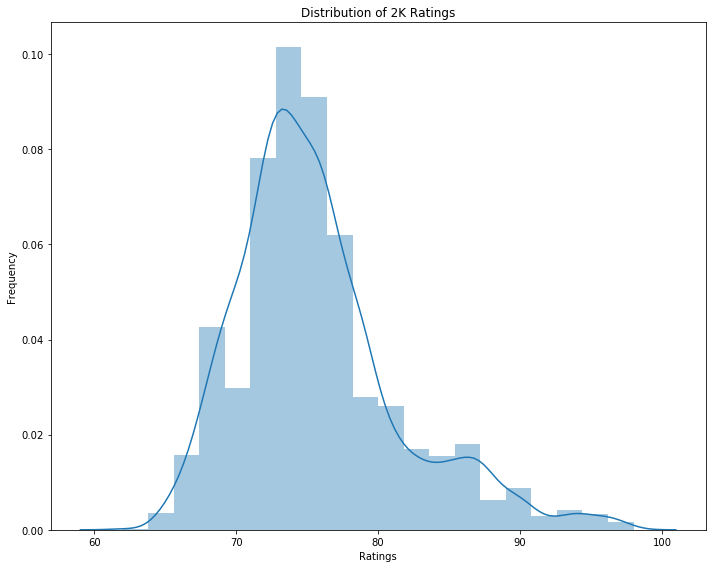

In [4]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.distplot(nba_df['rankings'], bins=20)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of 2K Ratings')
plt.tight_layout()

In [5]:
nba_df.sort_values(by=['rankings'], ascending=False).loc[:, ['PLAYER', 'TEAM', 'AGE', 'SEASON', 'PTS', 'FG%','3P%',
                                                             'FT%', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP',
                                                             'DD2', 'TD3', '+/-', 'rankings']]

,PLAYER,TEAM,AGE,SEASON,PTS,FG%,3P%,FT%,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
1130,LeBron James,CLE,33,2017-18,27.5,54.2,36.7,73.1,8.6,9.1,4.2,1.4,0.9,1.7,54.1,52.0,18.0,1.3,98.0
739,LeBron James,LAL,34,2018-19,27.4,51.0,33.9,66.5,8.5,8.3,3.6,1.3,0.6,1.7,52.0,32.0,8.0,2.1,97.0
316,LeBron James,LAL,35,2019-20,25.3,49.3,34.8,69.3,7.8,10.2,3.9,1.2,0.5,1.8,51.3,46.0,13.0,6.6,97.0
1109,Kevin Durant,GSW,29,2017-18,26.4,51.6,41.9,88.9,6.8,5.4,3.0,0.7,1.8,2.0,47.0,15.0,2.0,5.2,97.0
709,Kawhi Leonard,TOR,28,2018-19,26.6,49.6,37.1,85.4,7.3,3.3,2.0,1.8,0.4,1.5,44.8,14.0,0.0,5.9,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,Marcus Georges-Hunt,MIN,24,2017-18,1.4,43.8,26.7,61.9,0.4,0.2,0.1,0.1,0.0,0.8,2.5,0.0,0.0,-0.8,65.0
1135,Luke Kornet,NYK,22,2017-18,6.7,39.2,35.4,72.7,3.2,1.3,0.6,0.3,0.8,1.4,15.2,1.0,0.0,-3.6,65.0
1593,RJ Hunter,CHI,23,2016-17,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,-3.3,65.0
2227,Johnny O'Bryant III,MIL,22,2014-15,2.9,36.7,0.0,44.4,1.9,0.5,0.7,0.1,0.1,1.3,6.0,0.0,0.0,-2.9,64.0


We see that average NBA 2K rank is around 75-76, with the lowest rank being 62 with Sean Kilpatrick in 2K16 and the highest being 98 with Lebron in 2K19. The distribution does display a somewhat bell-shaped curve, so we can say that 2K does try to maintain a normal distribution.

Below, we see that LeBron James headlines the rankings leaderboards in every 2K game in the past five years; he's the top highest rated player in all five, with two ties in NBA 2K21 with Giannis and NBA 2K20 with Kawhi Leonard. 

In [6]:
years = ['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
top_players = pd.DataFrame(columns=nba_df.columns)
for year in years:
    season = nba_df[nba_df['SEASON'] == year]
    ranks = season[season['rankings'] == season['rankings'].max()]
    top_players = top_players.append(ranks)
top_players

,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,FGM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
2271,LeBron James,CLE,30,2014-15,69,50,19,36.1,25.3,9.0,...,7.4,3.9,1.6,0.7,2.0,46.5,22.0,2.0,7.8,94.0
1904,LeBron James,CLE,31,2015-16,76,56,20,35.6,25.3,9.7,...,6.8,3.3,1.4,0.6,1.9,47.1,28.0,3.0,8.1,96.0
1528,LeBron James,CLE,32,2016-17,74,51,23,37.8,26.4,9.9,...,8.7,4.1,1.2,0.6,1.8,51.3,42.0,13.0,6.5,97.0
1130,LeBron James,CLE,33,2017-18,82,50,32,36.9,27.5,10.5,...,9.1,4.2,1.4,0.9,1.7,54.1,52.0,18.0,1.3,98.0
709,Kawhi Leonard,TOR,28,2018-19,60,41,19,34.0,26.6,9.3,...,3.3,2.0,1.8,0.4,1.5,44.8,14.0,0.0,5.9,97.0
739,LeBron James,LAL,34,2018-19,55,28,27,35.2,27.4,10.1,...,8.3,3.6,1.3,0.6,1.7,52.0,32.0,8.0,2.1,97.0
173,Giannis Antetokounmpo,MIL,25,2019-20,63,51,12,30.4,29.5,10.9,...,5.6,3.7,1.0,1.0,3.1,56.6,56.0,4.0,10.8,97.0
316,LeBron James,LAL,35,2019-20,67,50,17,34.6,25.3,9.6,...,10.2,3.9,1.2,0.5,1.8,51.3,46.0,13.0,6.6,97.0


Now, what we really want to see is how these rankings reflect real life statistics. Does a player with a 98 OVR really have better IRL basketball stats than someone with a 95 OVR?

Below you will see an interactive visualization of the rankings and their respective real life stats. We've taken the average of all players in each rank and reflected it in the visualization. There are no players ranked 63 OVR in the past 5 games hence why the graph is omitted when the slider is at 63. 

**Move the slider below the graph to see how NBA player stats change with the given rating**.

In [7]:
averages = pd.DataFrame(columns=nba_df.columns)
for i in range(int(nba_df['rankings'].min()), int(nba_df['rankings'].max()+1)):
    ranking_df = nba_df[nba_df['rankings'] == i]
    if not ranking_df.empty:
        averages = averages.append(ranking_df.mean(), ignore_index=True)
        
averages.drop(['PLAYER', 'TEAM', 'SEASON'], axis=1, inplace=True)

In [25]:
import ipywidgets as widgets
from ipywidgets import interactive, VBox, Layout
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets.embed import embed_minimal_html
import plotly.io as pio
pio.renderers.default = "notebook"

average = nba_df[nba_df['rankings'] == 75].loc[:, ['PTS', 'REB', 'AST','STL', 'BLK',  'TOV', '+/-']]
fig = px.bar(average, x=['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV',  '+/-'], 
             y=average.mean(), title= 'Average NBA Stats for Given 2K Rating', text=average.mean(), 
             labels=dict(x="Stats", y="Mean"), width=1000, height=600 )  
fig.update_yaxes(range=[-3.5, 32])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
f = go.FigureWidget(fig)

def return_ave(ranking):
    ave = nba_df[nba_df['rankings'] == ranking].loc[:, ['PTS', 'REB', 'AST', 'STL', 'BLK',  'TOV', '+/-']].mean()
    f.data[0].y  = ave 
    f.update_traces(text = ave, texttemplate='%{text:.3g}', textposition='outside')

slider = widgets.IntSlider(value=75, min=62, max=98, description='Ratings', 
                           layout=Layout(width='50%', height='80px'))
w = widgets.interactive(return_ave, ranking=slider)
vb = VBox((f, w))
display(vb)

    'data': [{'alignmentgroup': 'True',
              'hoverlabel': {'namelength…

We can see a general linear trend between player statistics and player ratings. However, once we get to the higher ranks, these rankings seem to be a little bit more arbitray. 

LeBron was the highest rated player with a rating 98, but his production did not match other high ranking players. Players who were ranked 96 had a much higher PTS average, and players who were ranked 97 had a higher rebound average. The last column, `+/-`, is a metric used to indicate a player's impact on the game. A negative plus-minus shows that a player has an adverse impact on the game when he's on the floor, and ad positive means the opposite. More about that here: (https://www.basketball-reference.com/about/bpm2.html). 

LeBron's `+/-` is significantly lower than any of the high rated players, with only a +1.30. A value of +1.30 means the team is only 1.30 points per 100 possessions better than the other team on the floor. These aren't production numbers you would expect from a player with such a high ranking.

But we would be remiss in our analysis if we did not take into account that LeBron is the sole player representing the 98 rating. We mustn't make the mistake of comparing averages to a single year production. However, if we were to compare averages, it seems that even the 96 OVR players have higher statistical production than the 97 OVR players! 

It seems that the difference between these one or two rating points lie not within statistics but in context; LeBron was the cover athlete for 2K19, and perhaps 2K felt the need to boost his ranking a little bit more to push their cover athlete forward. Or LeBron might've gotten the nod due to his renown as a clutch performer.

## Modeling

Now we can move on to some modeling. We want to see what are the key metrics 2K uses to weigh their ratings. Although 2K has admitted that it's somewhat of a plug and chug model (see here: https://hoopshype.com/2017/08/20/nba-2k-ratings-how-they-are-determined-and-why-players-care-so-much-about-them/), they also do look at film to determine a player's contribution on the floor. 

Now of course 2K doesn't directly pull from NBA stats to make their ratings, they first encode the stats into individual ratings for each category, then run their model to get the OVR rating. But this rating encoding should still correspond to the actual stats. If you want to take a look at how 2K determines rankings from their own categories, I recommend this really informative Reddit post: https://www.reddit.com/r/NBA2k/comments/5zl48j/the_secrets_of_overall/ . 


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [10]:
X = nba_df.drop(['PLAYER', 'TEAM', 'SEASON', 'rankings', 'FP'], axis=1)
y = nba_df['rankings']

We can start by using Recursive Feature Elimination (RFE), which will find the optimal number of features by iteratively testing each combination of features. RFE will start by selecting all the features in the dataset, then iteratively remove the weakest feature in terms of the model's feature importances. RFE is a wrapper feature selection method, meaning we can choose what model we would like to use to evaluate the feature importances. We use Gradient Boosting, because it has an internal feature importance metric. RFECV is just RFE with GridSearch with cross validation, which will allow us to retrieve the optimal number of features without specifying the number of features we want. 

Number of Features Selected from RFECV: 22


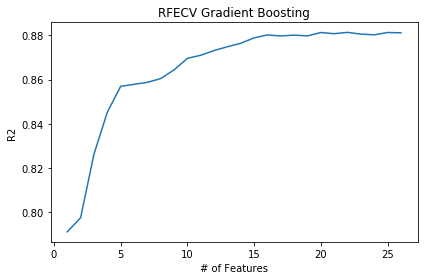

In [11]:
rfe = RFECV(GradientBoostingRegressor(random_state=0), cv=KFold(10), scoring='r2')
rfe.fit(X, y)
print('Number of Features Selected from RFECV:',  rfe.n_features_)
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.ylabel('R2')
plt.xlabel('# of Features')
plt.title('RFECV Gradient Boosting')
plt.tight_layout()

RFECV returned us 22 optimal features, and we can see in our graph that adding more features will not give us any improvement in R<sup>2</sup>. Perhaps we could have done less than 22 features as well, as the R<sup>2</sup> does not seem to be increasing past 15 features. 

In [18]:
pd.set_option('mode.chained_assignment', None)
X_copy = X.copy(deep=True)
X_subset = X_copy.loc[:, rfe.support_]
# ['AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'DREB', 'REB', 'AST', 'TOV', 
# 'STL', 'BLK', 'PF', 'DD2', 'TD3', '+/-']
X_subset['FGM'].corr(X_subset['PTS'])
X_subset.drop(['FGM'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, random_state=0)

After retrieving the optimal features, we can run a GridSearch on our model (XGBRegressor) to tune the optimal hyperparameters to achieve the best R<sup>2</sup>. 

In [13]:
xgb_param_grid = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                  "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
                  "min_child_weight": [ 1, 3, 5, 7 ],
                  "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}
xgb_pipe = (XGBRegressor(random_state=0))
xgb_grid = RandomizedSearchCV(xgb_pipe, xgb_param_grid, scoring='r2')
xgb_grid.fit(X_train, y_train)
print('XGB best params: ', xgb_grid.best_params_)
print('R2: ', xgb_grid.score(X_test, y_test))

XGB best params:  {'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.4}
R2:  0.8781105793243837


We can then look at what our model determines as the most important features: 

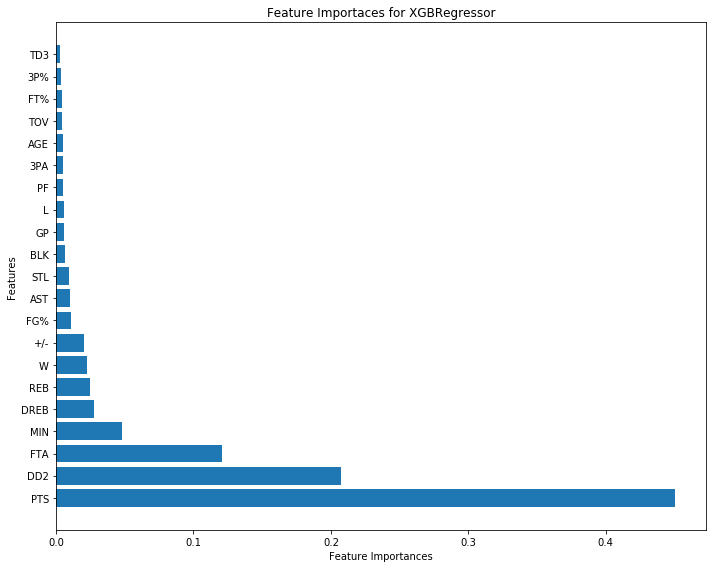

In [14]:
series = pd.Series(xgb_grid.best_estimator_.feature_importances_, X_subset.columns)
series.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10,8))
plt.barh(series.index, series.values)
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Feature Importaces for XGBRegressor')
plt.tight_layout()

The top five most important features are Points, Double-Doubles, Free Throw Attempts, Rebounds, and Minutes played. Understandably, player points are the most important feature. But since there is no direct attribute for points scored in 2K, points will be encoded on a 99 scale into two scoring categories: Outside Scoring and Inside Scoring. These categories contribute to a player's OVR rating. 

Double-Doubles is an interesting one, but it helps round out a player's ranking profile. For instance, a player like Draymond Green, who doesn't average a whole lot of points, is a double double machine. He was ranked a 90 OVR in 2K17 but only averaged 14 PPG! However, he managed to grab 33 double doubles in the season, surpassing the 90 OVR double double average.

Minutes played has a direct correlation to production on the court. Bench warmers don't get a lot of playing time, and their indivudal stats are quite low. This in turn gives them quite a low ranking. And it'ss quite easy to obtain the correct ranking for these bench players. My guess is that 2K does not really look at film of a player past a certain threshold, and opts to just plug stats into the model for these low-ranking players. It's for the role players and starters that 2K would want to look at film to finalize ratings.

Let's try Linear Regression. We fit the model and look at the coefficients below:

In [15]:
# should have probably used R but I'm stubborn
from sklearn import metrics
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
coef = zip(X_train.columns, lr.coef_)
sorted(coef, key = lambda x: np.abs(x[1]), reverse=True)

[('BLK', 1.3828076469809945),
 ('STL', 1.2463995665877483),
 ('PTS', 0.7563748562967664),
 ('TOV', -0.6759812421368842),
 ('AST', 0.6190602477679469),
 ('REB', 0.3172036754524746),
 ('DREB', 0.18788056095260558),
 ('PF', -0.17741610337764804),
 ('MIN', -0.13730792410094042),
 ('+/-', 0.05901733274090713),
 ('FTA', 0.05673739425911592),
 ('W', 0.04014269019017989),
 ('L', -0.0309441615491942),
 ('TD3', -0.029719079491106703),
 ('AGE', 0.023786140747656802),
 ('3PA', -0.02360100242361274),
 ('FG%', 0.019498144190379953),
 ('GP', 0.009198528640985758),
 ('3P%', -0.006375785495627011),
 ('DD2', -0.00423228301248926),
 ('FT%', -0.0009072942697452433)]

We see that `BLK`, `STL`, `PTS`, `TOV`, and `AST` have a significant impact on the model. It seems this model emphasizes more defensive attributes. This feature importance is a lot more intuitive than the gradient boosting method, but we can combine both approaches to achieve the lowest error on our predictions.

In [23]:
y_pred_xgb = xgb_grid.predict(X_test)
print('Mean Absolute Error (combining predictions): ', 
      metrics.mean_absolute_error(y_test, (0.6*y_pred+0.4*y_pred_xgb)))

Mean Absolute Error (combining predictions):  1.4014701259491844


If we combine the two predictions, you can see that **our overall predictions are around the actual rankings, plus or minus 1.4.** 

Interestingly enough, both models indicated that `FG%` was not a big factor in determining rankings, giving some slack to the more volume shooters. `Age` and `TD3` are nonfactors as well. 

## Conclusion

So we've learned a few things: NBA box scores and 2K rankings do seem to have a **positive correlation**. If a player is more productive on the court (in terms of stats), then we should expect that player to have a higher ranking. But once we progress into the higher ranking players, these ranking assignments become more or less arbitrary and may depend on looking at film. 

Stats that seem like they would be good predictors in rankings, such as **field goal percentages, have almost no bearing on the result**. This backs up 2K's claim of not just looking at the whole picture. Quoted from Complex's interview with 2K, 2K stated: 

<em>"If a player has a 37 percentage for his 3-point shot, we're interested in 'how'," Stauffer said. "Not every 3-point shot is the same. There's always a variable. For example, if Steph Curry has to run across the whole court through multiple screens to find an open 3—or has to shoot from far back to get open—does his percentage tell the whole story?"</em>

And this makes sense. Digging around, I managed to find that Joe Harris, whose career 3P% is on par with Steph Curry's, has not only a much lower OVR ranking than Curry, but also a much lower 3P shot ranking in 2K. Joe Harris shoots most of his three's wide open off screens, where Curry will usually see double teams everywhere he goes around the perimter.

This concludes the analysis in NBA 2K rankings. Thanks for reading!

### Resources
- https://www.complex.com/sports/2017/10/how-nba-2k-determines-player-rankings
- https://www.basketball-reference.com/about/bpm2.html
- https://hoopshype.com/2017/08/20/nba-2k-ratings-how-they-are-determined-and-why-players-care-so-much-about-them/
- https://www.reddit.com/r/NBA2k/comments/5zl48j/the_secrets_of_overall/